# ຈໍາແນກ ice-cream ດ້ວຍ cluster analysis

- ປະກາດໃຊ້ Library ແລະ ວາງຕົວປ່ຽນເພື່ອໃຫ້ງ່າຍຕໍ່ການໃຊ້ງານ 
ໂດຍ pandas ເປັນ pd, numpy ເປັນ np, matplotlib.pyplot ເປັນ plt ແລະ seaborn ເປັນ sns

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'


- ໃຊ້ຄຳສັ່ງສະແດງ version ຂອງ Library pandas, numpy ແລະ seaborn

In [36]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.4.2
numpy   version = 1.22.3
seaborn version = 0.11.2


- ດຶງຂໍ້ມູນຈາກລິ້ງ github ມາສະແດງຜ່ານຕົວແປ df ດ້ວຍຄຳສັ່ງ sample(10) ກໍ່ຄືເປັນການສຸ່ມຂໍ້ມູນມາສະແດງ 10 ແຖວ

In [37]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/BaskinRobbins.tsv', sep='\t')
df.sample(10)

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Sugar Alcohol (g)
17,Citrus Twist Ice,100,0.0,0.0,25,18,0.0,NaN
13,Chocolate Chip Cookie Dough,280,15.0,0.5,31,23,5.0,NaN
9,Cherries Jubilee,220,11.0,0.4,26,19,4.0,NaN
42,Peanut Butter ‘n Chocolate,290,20.0,0.4,24,17,7.0,NaN
54,Reese Peanut Butter Cup,180,11.0,0.3,17,14,4.0,NaN
20,Cotton Candy,240,12.0,0.4,31,20,4.0,NaN
33,Mango Sorbet,70,0.0,0.0,16,12,0.0,NaN
50,Rainbow Sherbet,130,2.0,0.1,27,20,1.0,NaN
15,Chocolate Hazelnut Truffle,280,17.0,0.4,29,20,5.0,NaN
65,Very Berry Strawberry,200,10.0,0.4,24,21,4.0,NaN


- ສະແດງລາຍລະອຽດຂອງຂໍ້ມູນດ້ວຍຄຳສັ່ງ info() 
- ເຫັນວ່າມີຂໍ້ມູນ 70 ແຖວ ຫຼື 70 entries
- ຈາກນັ້ນທຳການສັ່ງເກດວ່າແຕ່ລະ Column ມີຂໍ້ມູນຄົບ 70 ແຖວທຸກອັນຫຼືບໍ່
- ຈາກການສັງເກດເຫັນວ່າມີພຽງ Sugar Alcohol ທີ່ມີ 3 ແຖວ ໝາຍຄວາມວ່າມີແຖວຫວ່າງຢູ່ 67 ແຖວ

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
 7   Sugar Alcohol (g)  3 non-null      float64
dtypes: float64(4), int64(3), object(1)
memory usage: 4.5+ KB


- ໃຊ້ຄຳສັ່ງ drop ລົບ colums Sugar Alcohol ເຊິ່ງເປັນ colums ທີ່ມີຄ່າບໍ່ຄົບ 70 ແຖວ
- ແລ້ວທຳການສະແດງຂໍ້ມູນຜ່ານຕົວແປ df ດ້ວຍຄຳສັ່ງ head()

In [39]:
df.drop(columns=['Sugar Alcohol (g)'], inplace=True)
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,Bananas Foster,160,8.0,0.2,20,16,2.0
1,Baseball Nut,160,9.0,0.2,19,13,3.0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0


- ໃຊ້ຄຳສັ່ງ df.columns ເພື່ອເບິ່ງ columns ທັງໝົດ

In [40]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)'],
      dtype='object')

- ສ້າງຕົວແປ cols ຂອງກຸ່ມ columns ຂ້າງເທິງທີ່ໄດ້ທຳການກ່ອນໜ້ານັ້ນ

In [41]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']

- ໃຊ້ຄຳສັ່ງ sns.pairplot ໃນການນຳເອົາທຸກ column ທີ່ເປັນຕົວເລກມາ plot graph ເປັນຄູ່ໆ

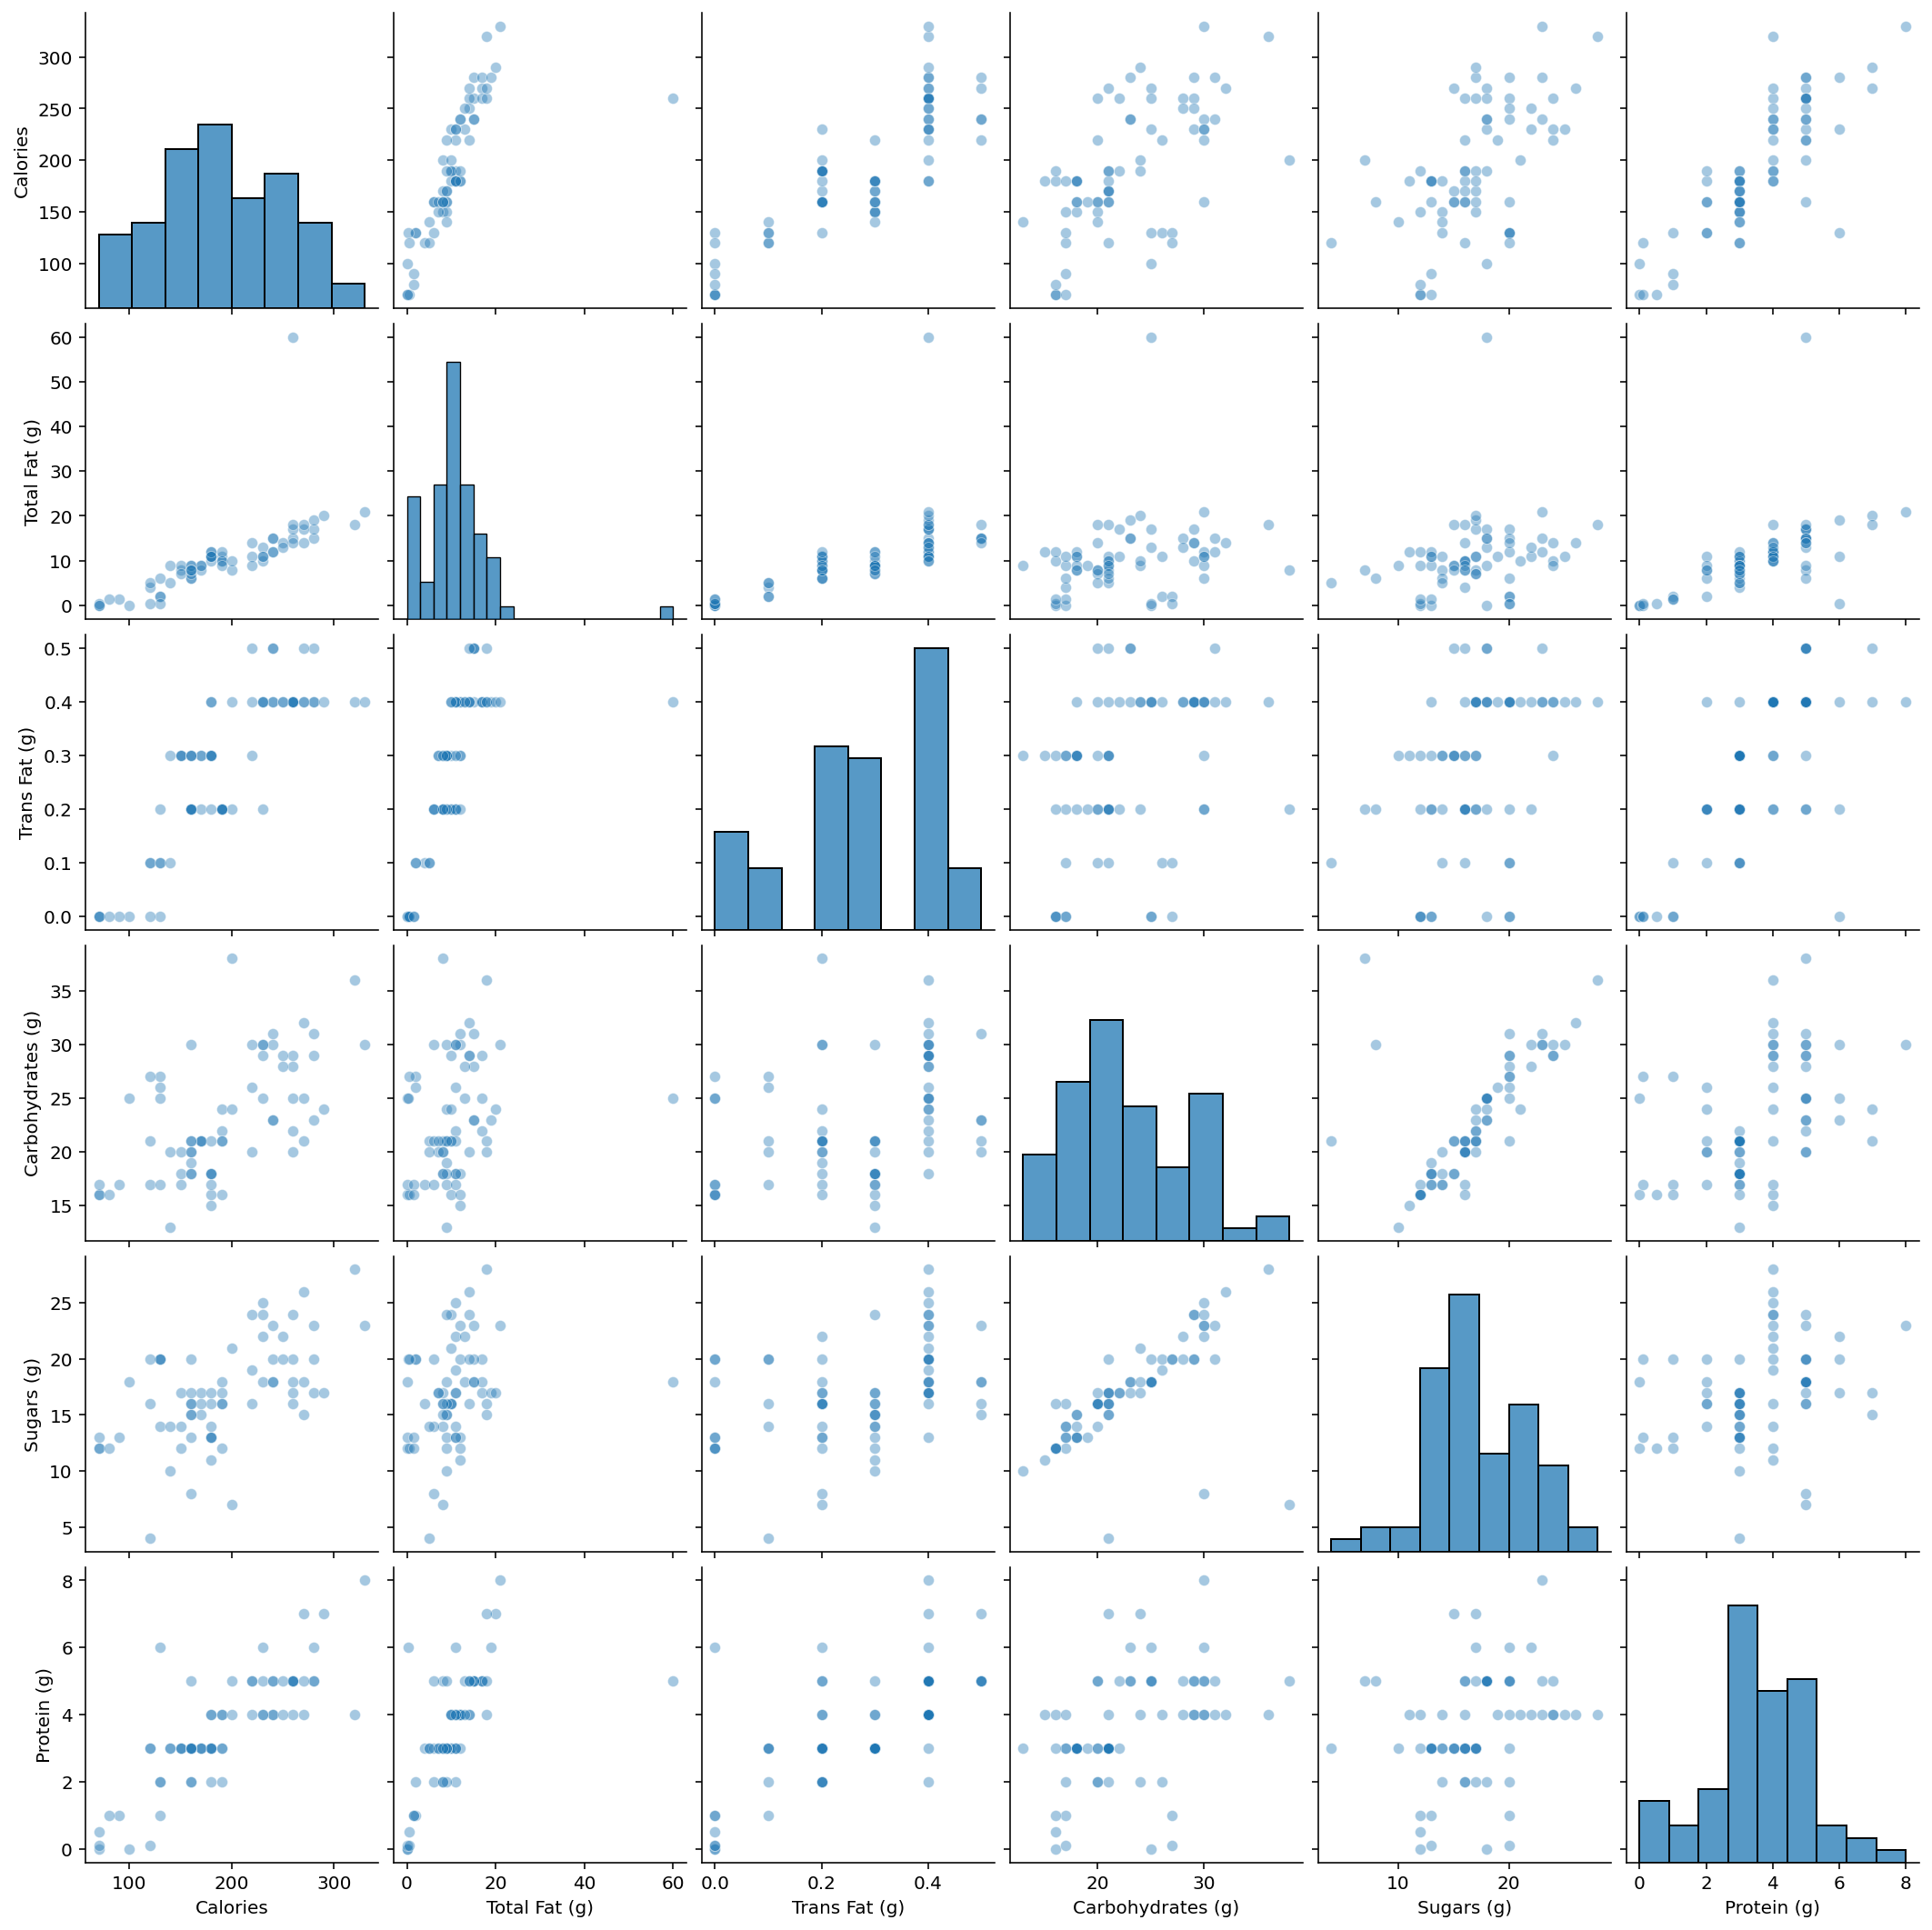

In [42]:
sns.pairplot(df, vars=cols, 
             plot_kws={'alpha': .4});

# Scikit-learn: KMeans Clustering

- ຂໍໃຊ້ຄຳສັ່ງ preprocessing ຈາກ library scikit-learn ແລະ KMeans ຈາກ library sklearn.cluster

In [43]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

- ສະແດງ columns 

In [44]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)'],
      dtype='object')

- ສ້າງຕົວແປ cols ຂອງກຸ່ມ columns
- ໃຊ້ preprocessing ມາ scaler ຂໍ້ມູນໃຫ້ຢູ່ໃນມາດຕະຖານດຽວກັນ ໂດຍຈະມີການ scaler ຢູ່ 2 ແບບຄື: ແບບທຳອິດ ແບບ preprocessing.StandardScaler() ເປັນການແປງຂໍ້ມູນໃຫ້ເປັນໃນຮູບແບບ z-score

- ໃນນີ້ z[:5].round(4) ໝາຍເຖິງສະແດງຂໍ້ມູນ 5 ແຸຖວ ໂດຍໃຫ້ຕົວເລກມີຫຼັງຈຸດ 4 ຕົວ ແລະ ເກັບໃນຕົວແປ z

In [45]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']
## z-score
scaler = preprocessing.StandardScaler() # create StandardScaler instance
z=scaler.fit_transform(df[cols]) # calc z-score
z[:5].round(4) # 2D numpy array

array([[-0.5182, -0.3248, -0.5335, -0.5358, -0.2048, -0.94  ],
       [-0.5182, -0.1981, -0.5335, -0.7206, -0.8767, -0.3402],
       [-0.3548, -0.1981,  0.1581, -0.3511, -0.4287, -0.3402],
       [-1.1718, -0.8318, -1.2251, -1.0902, -0.2048, -0.3402],
       [-1.0084, -1.0852, -1.2251,  0.5728,  0.6911, -0.94  ]])

- ແບບທີ່ 2 ເປັນແບບ preprocessing.PowerTransformer 
- ສະແດງຂໍ້ມູນ 5 ແຸຖວ ໂດຍໃຫ້ຕົວເລກມີຫຼັງຈຸດ 4 ຕົວ ແລະ ເກັບໃນຕົວແປ mat

In [46]:
## Yeo-Johnson transformation (preferable)
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True) # support only positive value
mat = pt.fit_transform(df[cols])
mat[:5].round(4)


array([[-0.4998, -0.1914, -0.644 , -0.4474, -0.2191, -0.9432],
       [-0.4998, -0.0397, -0.644 , -0.6723, -0.8836, -0.3465],
       [-0.3343, -0.0397,  0.0461, -0.2353, -0.4421, -0.3465],
       [-1.1757, -0.92  , -1.2227, -1.1663, -0.2191, -0.3465],
       [-1.0044, -1.417 , -1.2227,  0.6729,  0.6865, -0.9432]])

- ສ້າງ column bc_cols ຂື້ນມາເພື່ອເກັບຂໍ້ມູນທີ່ມີການ scaler ແບບ preprocessing.PowerTransformer

In [47]:
bc_cols = [f'bc_{c}' for c in cols]
bc_cols


['bc_Calories',
 'bc_Total Fat (g)',
 'bc_Trans Fat (g)',
 'bc_Carbohydrates (g)',
 'bc_Sugars (g)',
 'bc_Protein (g)']

- ສ້າງ column z_cols ຂື້ນມາເພື່ອເກັບຂໍ້ມູນທີ່ມີການ scaler ແບບ preprocessing.StandardScaler

In [48]:
z_cols = [f'z_{c}' for c in cols]
z_cols


['z_Calories',
 'z_Total Fat (g)',
 'z_Trans Fat (g)',
 'z_Carbohydrates (g)',
 'z_Sugars (g)',
 'z_Protein (g)']

- ສ້າງຕົວແປ ດາຕ້າເຟມ ຂື້ນມາໃຫມ່ຊື່ວ່າ ds ໂດຍນຳເອົາຄ່າທີ່ທຳການ scaler ກ່ອນໜ້ານີ້ ທີ່ເກັບໄວ້ໃນຕົວແປ mat ແລະ z ທັງ 2 ແບບຕື່ມເຂົ້າໄປໃນ ດາຕ້າເຟມເກົ່າ
- ແລ້ວທຳການສະແດງດ້ວຍຄຳສັ່ງ head()

In [49]:
ds=pd.concat([df, pd.DataFrame(mat, columns=bc_cols), pd.DataFrame(z, columns=z_cols)], axis='columns')
ds.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),bc_Calories,bc_Total Fat (g),bc_Trans Fat (g),bc_Carbohydrates (g),bc_Sugars (g),bc_Protein (g),z_Calories,z_Total Fat (g),z_Trans Fat (g),z_Carbohydrates (g),z_Sugars (g),z_Protein (g)
0,Bananas Foster,160,8.0,0.2,20,16,2.0,-0.499816,-0.191406,-0.643961,-0.447402,-0.219051,-0.943181,-0.518194,-0.324811,-0.533530,-0.535844,-0.204771,-0.94002
1,Baseball Nut,160,9.0,0.2,19,13,3.0,-0.499816,-0.039724,-0.643961,-0.672273,-0.883644,-0.346462,-0.518194,-0.198073,-0.533530,-0.720618,-0.876675,-0.34019
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,-0.334348,-0.039724,0.046059,-0.235261,-0.442092,-0.346462,-0.354799,-0.198073,0.158083,-0.351070,-0.428739,-0.34019
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,-1.175713,-0.919995,-1.222738,-1.166310,-0.219051,-0.346462,-1.171772,-0.831762,-1.225143,-1.090165,-0.204771,-0.34019
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,-1.004409,-1.417016,-1.222738,0.672892,0.686477,-0.943181,-1.008377,-1.085238,-1.225143,0.572799,0.691102,-0.94002


- ໃຊ້ຄຳສັ່ງ hist ສະແດງກຣາຟຂອງຄ່າສະຖິຕິຄວາມຖີ່ ຂອງ ds

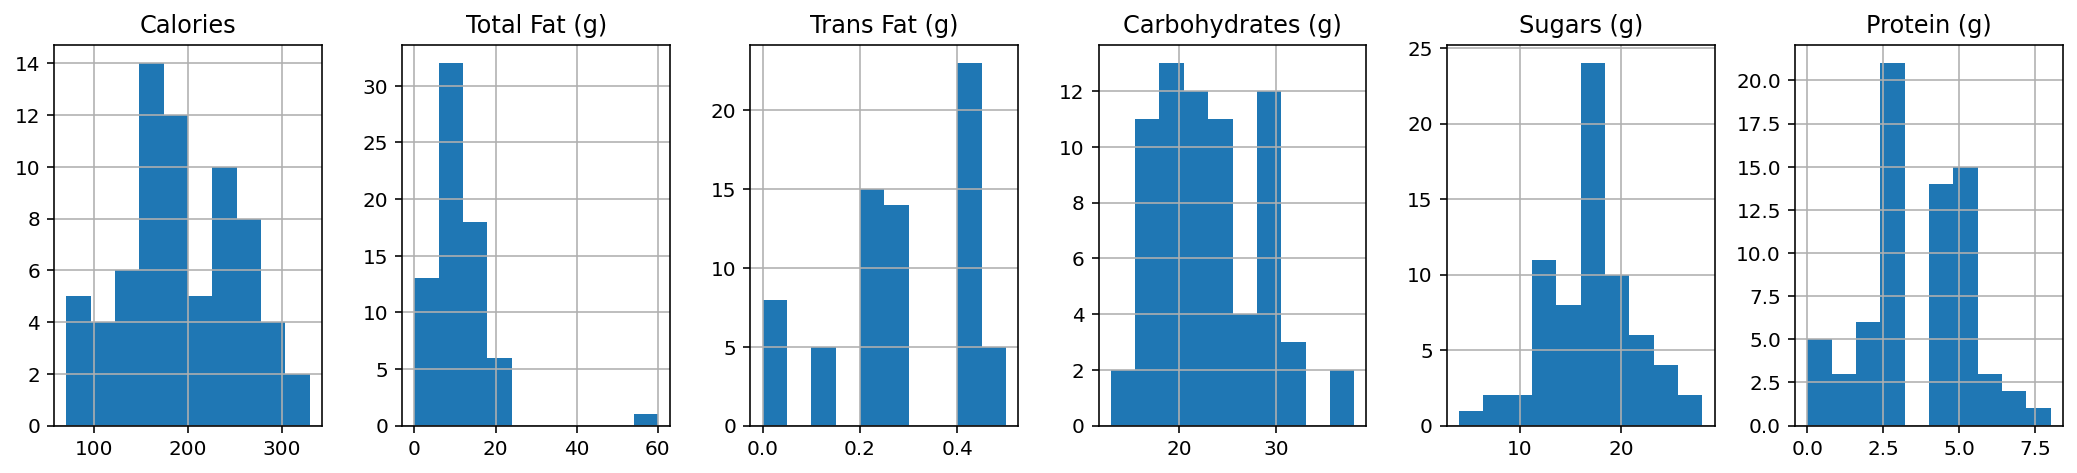

In [50]:
ds[cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5));

- ໃຊ້ຄຳສັ່ງ hist ສະແດງກຣາຟຂອງຄ່າສະຖິຕິຄວາມຖີ່ ຂອງ z_cols

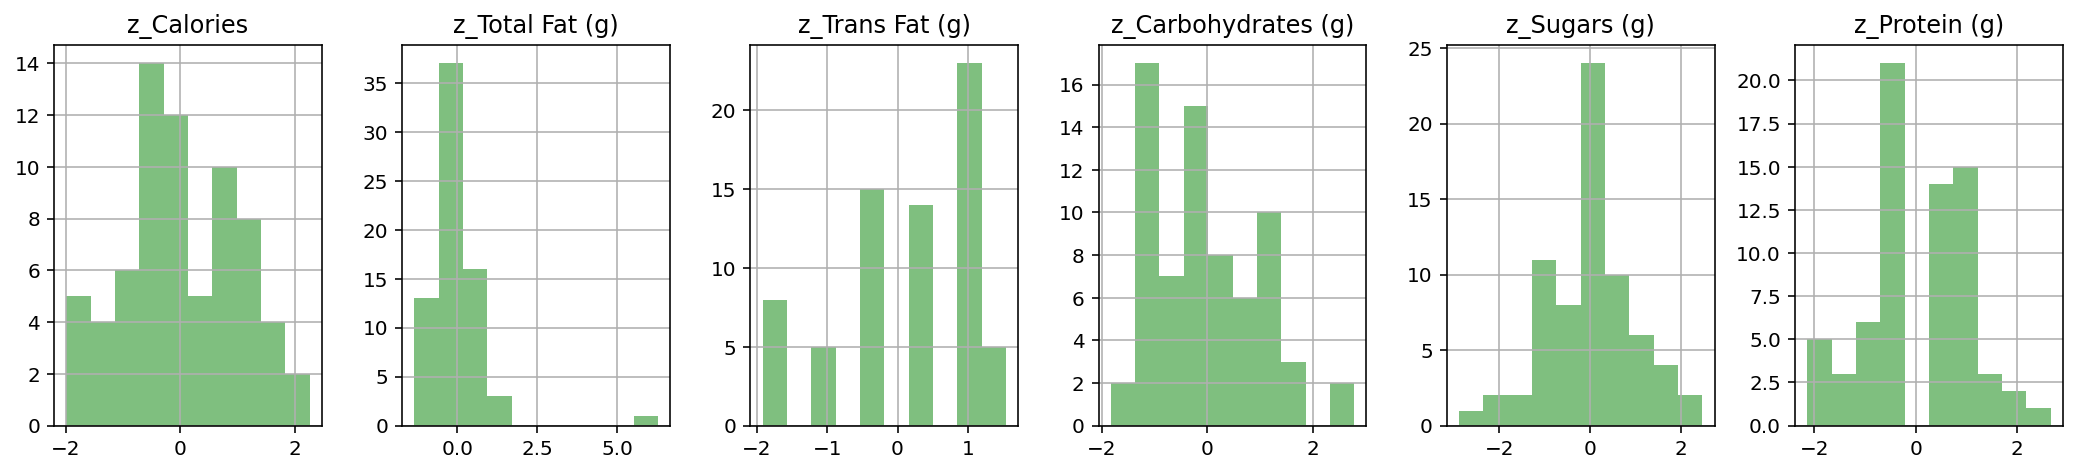

In [51]:
ds[z_cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5), color='green', alpha=.5);

- ໃຊ້ຄຳສັ່ງ hist ສະແດງກຣາຟຂອງຄ່າສະຖິຕິຄວາມຖີ່ ຂອງ bc_cols

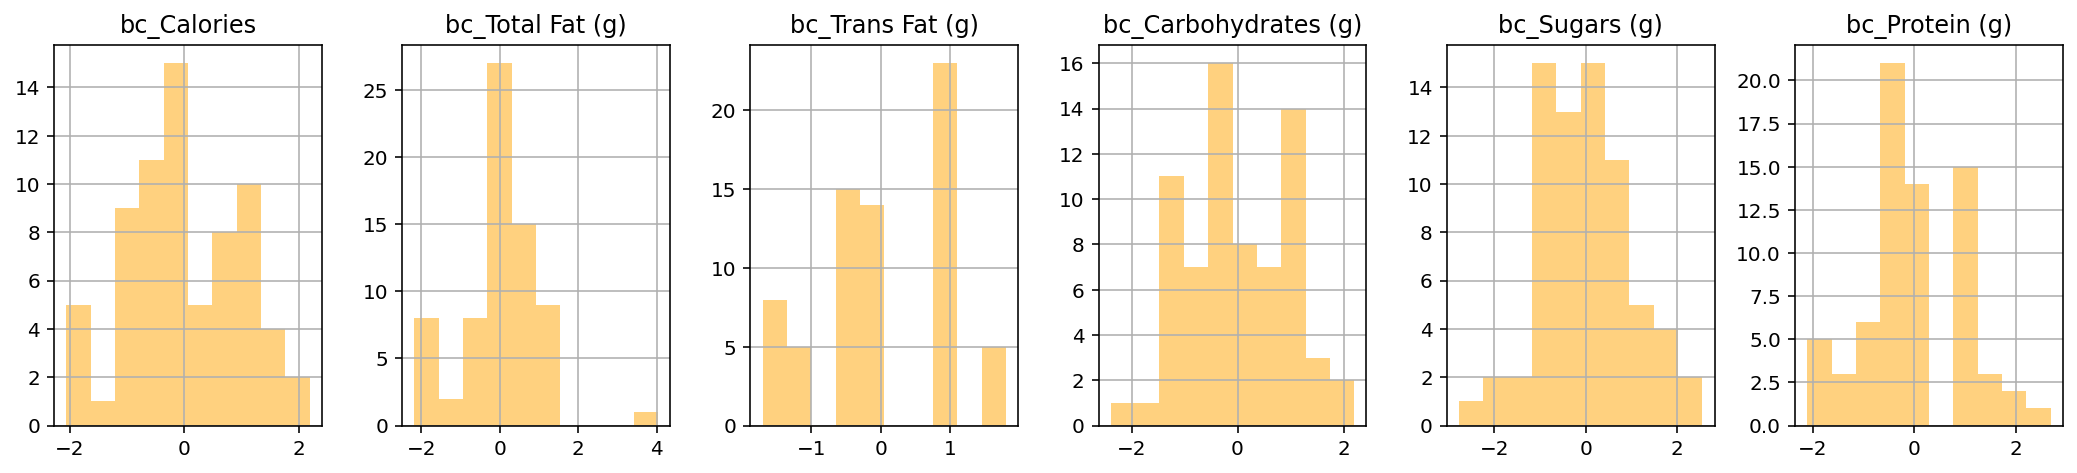

In [52]:
ds[bc_cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5), color='orange', alpha=.5);

- ສ້າງຕົວແປ x ຂື້ນມາເກັບຂໍ້ມູນໃນຕົວແປ mat ແລ້ວນຳມາສະແດງຜ່ານຕົວແປ x ເຊິ່ງວ່າຂໍ້ມູນເຫຼົ່ານີ້ຈະຖືກນຳໄປເຮັດ k-means

In [79]:
X=pd.DataFrame(mat, columns=cols) ## power transformation (preferable)
# X=pd.DataFrame(z, columns=cols) ## z-score
X.head()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,-0.499816,-0.191406,-0.643961,-0.447402,-0.219051,-0.943181
1,-0.499816,-0.039724,-0.643961,-0.672273,-0.883644,-0.346462
2,-0.334348,-0.039724,0.046059,-0.235261,-0.442092,-0.346462
3,-1.175713,-0.919995,-1.222738,-1.166310,-0.219051,-0.346462
4,-1.004409,-1.417016,-1.222738,0.672892,0.686477,-0.943181


scatter matrix with transformed data

- ສະແດງຄວາມສຳພັນຂອງຂໍ້ມູນໃນຕົວແປ x ຜ່ານ plot graph

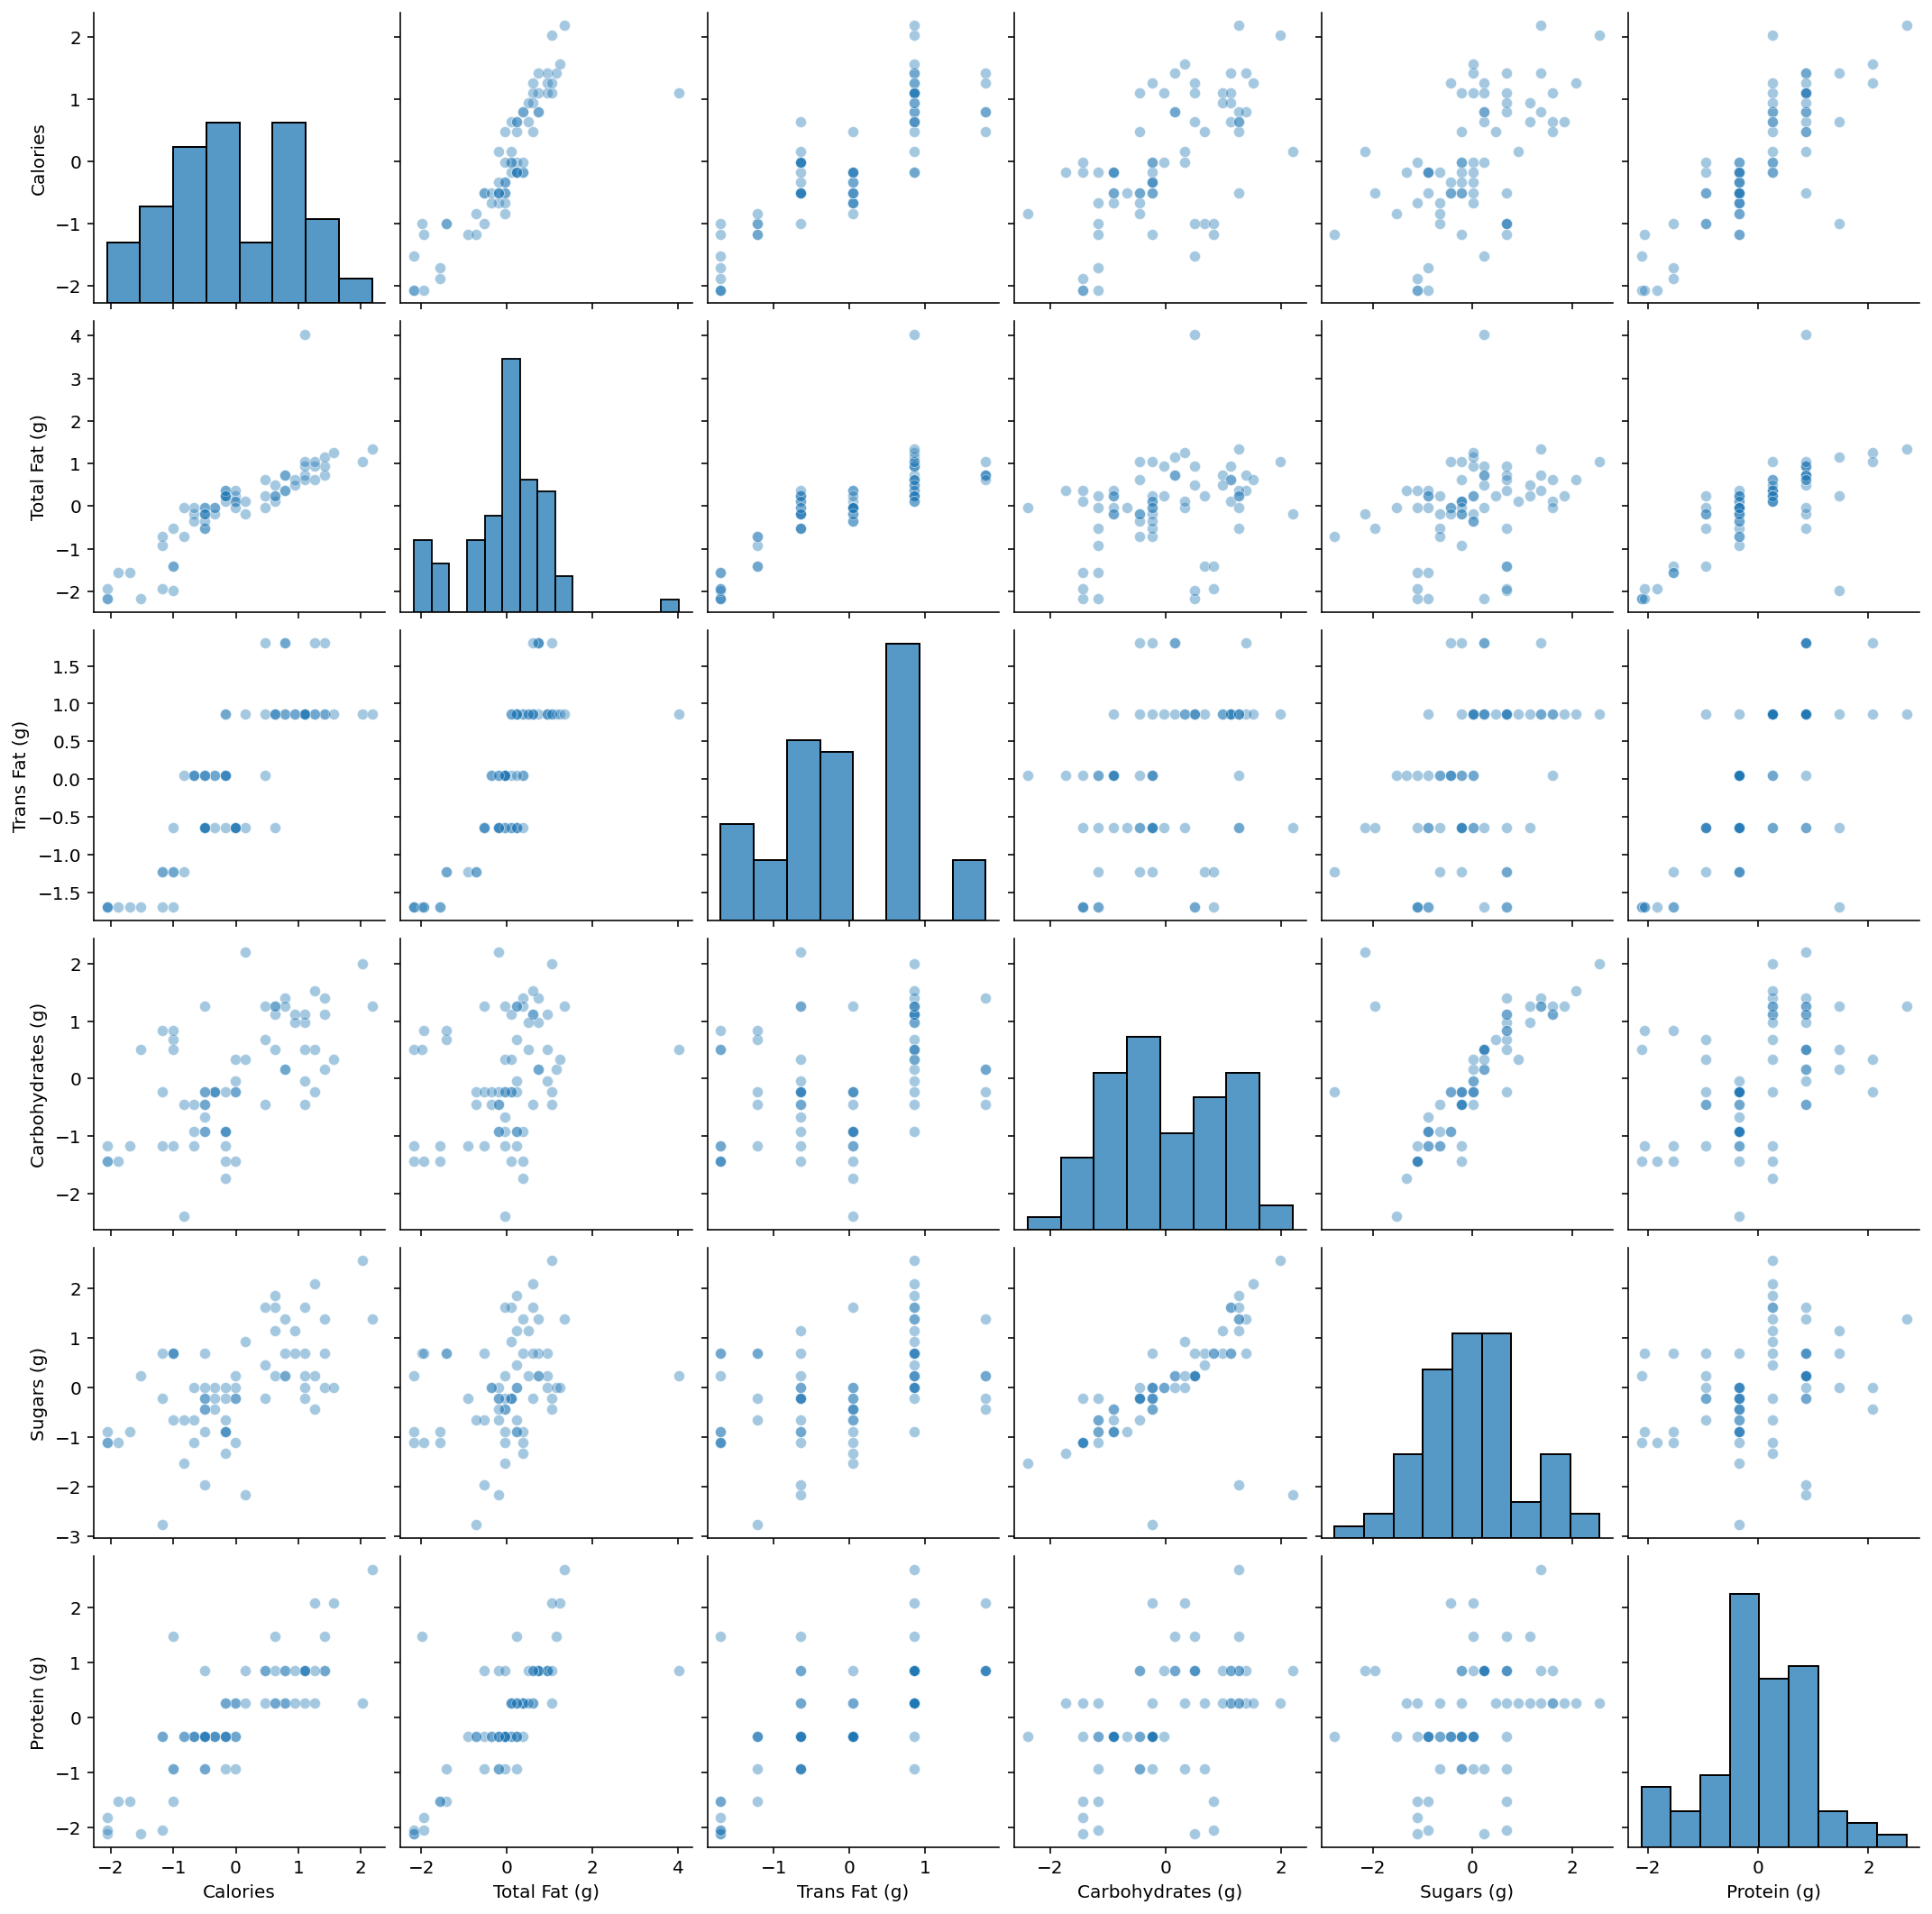

In [80]:
sns.pairplot(X, 
             plot_kws={'alpha': .4});


# Scikit-learn: KMeans Clustering

- ຫາຄ່າຈຳນວນທີ່ເໝາະສົມຂອງ clusters ດ້ວຍ Elbow method
- ssd ຈະເປັນຜົນລວມໄລຍະຫ່າງຂອງ cluster
- ແລະ ມີການກຳນົດ  cluster ມີຄ່າຕັ້ງແຕ່ 2 ຫາ 10 

In [138]:
ssd=[]
for k in range(2, 10):
    m=KMeans(n_clusters=k)
    m.fit(X)

In [141]:
ssd.append([k, m.inertia_])
ssd


[[9, 64.47550035681363], [9, 64.47550035681363]]

- ແປງຄ່າ ssd ໃຫ້ເປັນ numpy array 
- ສະແດງຜ່ານຕົວແປ xy 

In [142]:
xy=np.array(ssd)
print(xy)


[[ 9.         64.47550036]
 [ 9.         64.47550036]]


- ສະແດງ plot graph ຂອງຕົວແປ xy

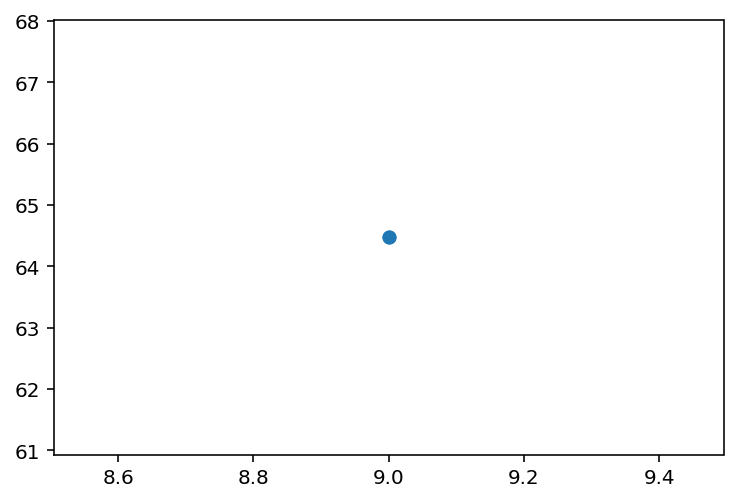

In [143]:
plt.plot(xy[:, 0], xy[:, 1], linestyle='--', marker='o')
# plt.plot(xy[:, 0], xy[:, 1], '--o')

- ສະແດງຄ່າຂອງ k ແລະ ssd ຜ່ານຕົວແປ dd ທີ່ໄດ້ສ້າງຂື້ນມາໃຫມ່

In [144]:
dd=pd.DataFrame(ssd, columns=['k', 'ssd'])
dd

,k,ssd
0,9,64.4755
1,9,64.4755


- ສະແດງຄ່າເປີເຊັນການປ່ຽນແປງຂອງ clusters

In [145]:
dd['pct_chg']=dd['ssd'].pct_change() * 100
dd

,k,ssd,pct_chg
0,9,64.4755,NaN
1,9,64.4755,0.0


- ສະແດງ plot graph ຂອງຕົວແປ dd ແບບມີການສະແດງຄ່າເປີເຊັນການປ່ຽນແປງ

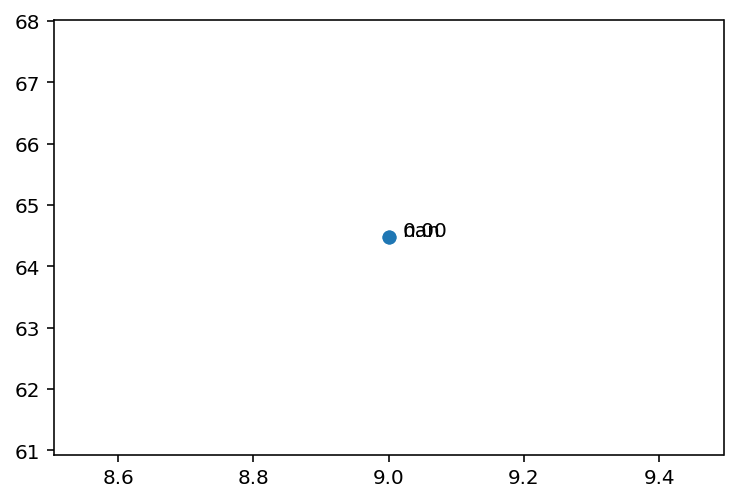

In [146]:
plt.plot(dd['k'], dd['ssd'], linestyle='--', marker='o')
# plt.plot(xy[:, 0], xy[:, 1], '--o')
for index, row in dd.iterrows():
    plt.text(row['k']+.02, row['ssd']+.02, f'{row["pct_chg"]:.2f}', fontsize=10)

# fit the model

- ສ້າງ ແລະ ສະແດງຕົວແປ model ທີ່ກຳນົດຄ່າ n_clusters=3

In [89]:
model = KMeans(n_clusters=3)
model
# X=df[cols]

KMeans(n_clusters=3)

- ທຳການ fit ໂມເດວດ້ວຍຄຳສັ່ງ model.fit(X)

In [90]:
model.fit(X)

KMeans(n_clusters=3)

- ໃຊ້ຄຳສັ່ງສະແດງ cluster ໂດຍກຳນົດໃຫ້ມີ ຫຼັງຈຸດ 4 ຕົວ

In [116]:
model.cluster_centers_.round(4)

array([[ 1.0208,  0.7778,  0.9435,  0.7589,  0.7909,  0.8394],
       [-0.4093, -0.1074, -0.324 , -0.5609, -0.6265, -0.2892],
       [-1.5485, -1.8342, -1.605 , -0.33  , -0.2096, -1.425 ]])

- ສະແດງໄລຍະຫ່າງຂອງແຕ່ລະຈຸດ ແຕ່ລະເຊັນທອຍ

In [92]:
model.transform(X) # the distance between each point and centroid

array([[3.38003665, 0.8510254 , 2.22891027],
       [3.42920514, 0.44375572, 2.64161598],
       [2.68797166, 0.53899753, 2.94049125],
       [4.30496741, 1.60971142, 1.72730412],
       [4.09969758, 2.55945588, 1.63009151],
       [3.3020949 , 0.58112177, 2.81242916],
       [5.17795727, 2.54226966, 3.04371205],
       [2.88230237, 0.78971948, 2.51295897],
       [3.87618946, 3.42776273, 4.68815556],
       [1.02624737, 2.3012883 , 4.3289111 ],
       [2.55318582, 1.03172164, 2.98306453],
       [0.78263417, 2.45952729, 4.7301037 ],
       [1.21127176, 3.03860246, 5.41386831],
       [1.28332786, 4.21012426, 6.1398813 ],
       [3.60787468, 0.89644415, 3.06312134],
       [0.58293092, 3.4259425 , 5.54534523],
       [3.35078705, 0.68732081, 3.0134846 ],
       [5.5930566 , 3.55237834, 1.22435935],
       [2.72866365, 0.76427502, 2.86837044],
       [0.68691377, 2.91712779, 5.27575522],
       [0.99156408, 2.98638999, 4.79693473],
       [2.54910642, 1.58347506, 3.54314424],
       [3.

- ສະແດງຄ່າແບບເປັນ label

In [93]:
model.labels_

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 2, 0, 2, 2, 0, 1, 2, 0,
       2, 2, 1, 0])

sense making about each cluster

- ນຳຄ່າ label ຂ້າງເທິງມາສ້າງເປັນ column ໃຫມ່ຊື່ວ່າ cluster

In [117]:
df['cluster']=model.labels_
df.head()


,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
0,Bananas Foster,160,8.0,0.2,20,16,2.0,1
1,Baseball Nut,160,9.0,0.2,19,13,3.0,1
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,1
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,1
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,2


- ສະແດງລາຍລະອຽດທັງໝົດຂອງ cluster

In [118]:
df.groupby('cluster').describe().T

cluster                           0           1           2
Calories          count   28.000000   32.000000   10.000000
                  mean   254.642857  165.625000   99.000000
                  std     29.749839   20.781117   26.436507
                  min    200.000000  120.000000   70.000000
                  25%    230.000000  157.500000   72.500000
                  50%    255.000000  165.000000   95.000000
                  75%    270.000000  180.000000  127.500000
                  max    330.000000  200.000000  130.000000
Total Fat (g)     count   28.000000   32.000000   10.000000
                  mean    16.178571    8.687500    0.840000
                  std      9.161326    2.161802    0.823542
                  min      9.000000    4.000000    0.000000
                  25%     12.000000    7.750000    0.100000
                  50%     14.500000    9.000000    0.500000
                  75%     17.250000   10.250000    1.500000
                  max     60.000000   12.000000    2.000000
Trans Fat (g)     count   28.000000   32.000000   10.000000
                  mean     0.407143    0.243750    0.020000
                  std      0.060422    0.075935    0.042164
                  min      0.200000    0.100000    0.000000
                  25%      0.400000    0.200000    0.000000
                  50%      0.400000    0.200000    0.000000
                  75%      0.400000    0.300000    0.000000
                  max      0.500000    0.400000    0.100000
Carbohydrates (g) count   28.000000   32.000000   10.000000
                  mean    26.892857   19.937500   21.200000
                  std      4.030801    4.471685    5.116422
                  min     20.000000   13.000000   16.000000
                  25%     23.750000   17.750000   16.250000
                  50%     28.000000   20.000000   21.000000
                  75%     30.000000   21.000000   25.750000
                  max     36.000000   38.000000   27.000000
Sugars (g)        count   28.000000   32.000000   10.000000
                  mean    20.428571   14.125000   16.000000
                  std      3.382182    3.357707    3.858612
                  min     15.000000    4.000000   12.000000
                  25%     18.000000   13.000000   12.250000
                  50%     20.000000   15.000000   15.500000
                  75%     23.000000   16.000000   20.000000
                  max     28.000000   20.000000   20.000000
Protein (g)       count   28.000000   32.000000   10.000000
                  mean     4.964286    3.093750    1.170000
                  std      1.035737    0.734380    1.812947
                  min      4.000000    2.000000    0.000000
                  25%      4.000000    3.000000    0.100000
                  50%      5.000000    3.000000    0.750000
                  75%      5.000000    3.000000    1.000000
                  max      8.000000    5.000000    6.000000

- ສະແດງ cluster ໃນຮູບແບບ graph

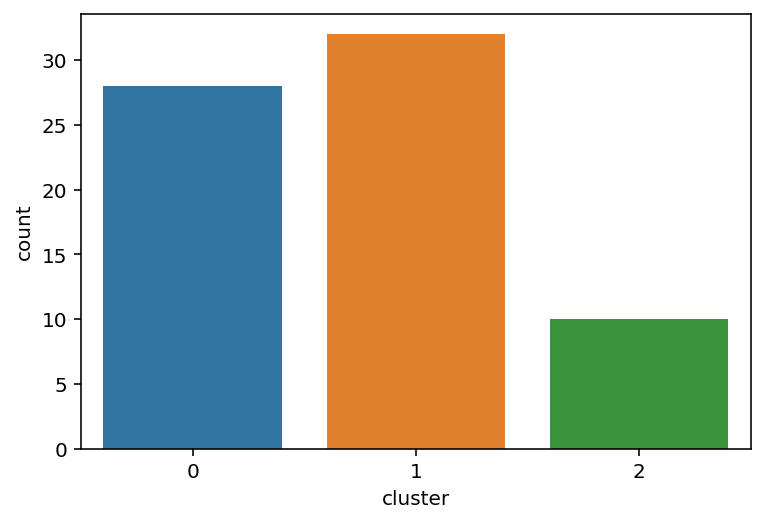

In [119]:
sns.countplot(x='cluster', data=df);

- ສະແດງ columns ຕົວແປ df

In [120]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'cluster'],
      dtype='object')

- ສະແດງຂໍ້ມູນໃນຮູບແບບ violin plot 

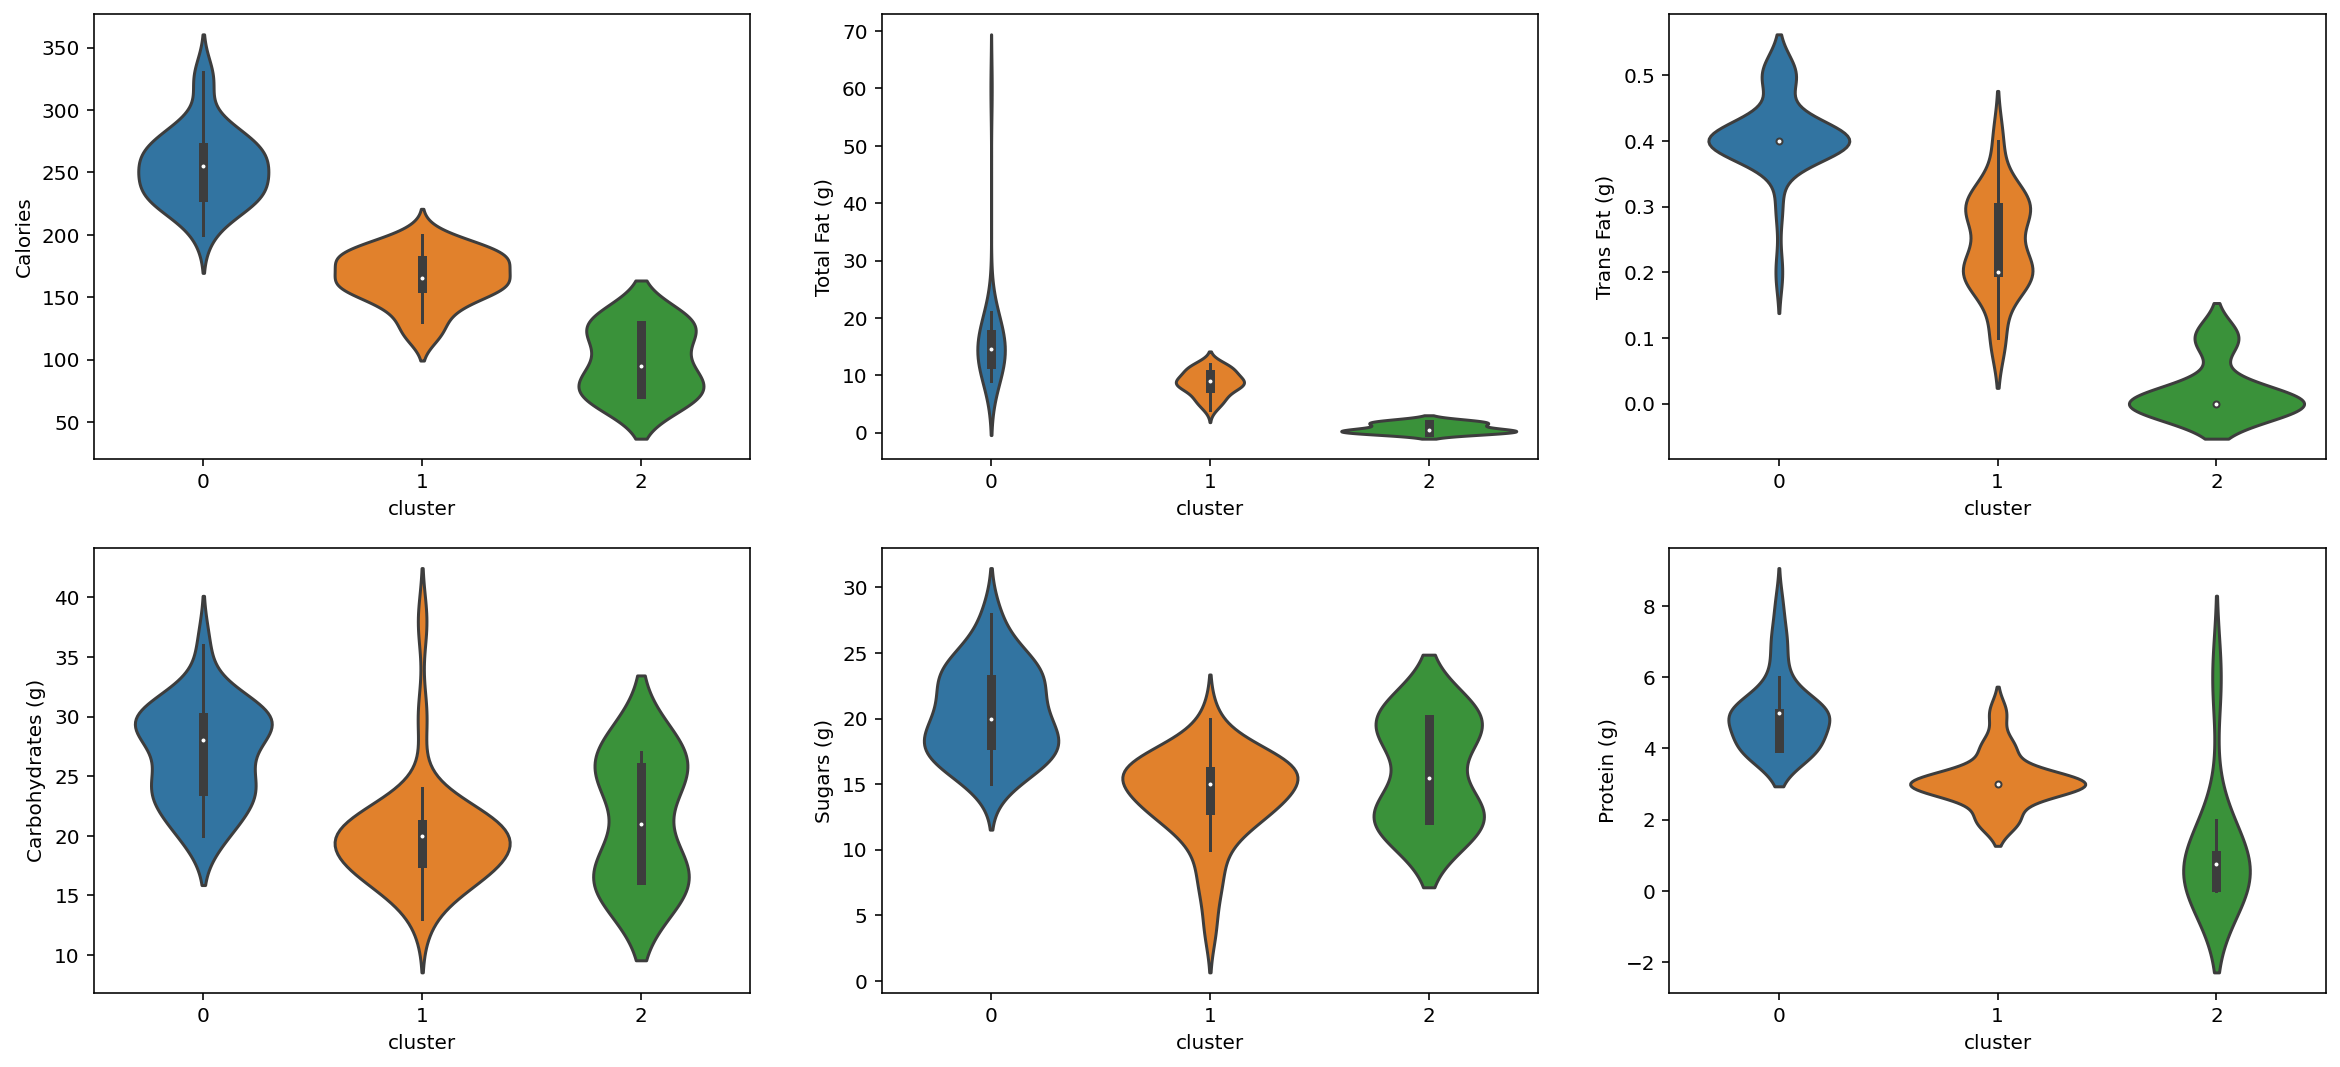

In [121]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 9))
ax=ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x='cluster', y=col, data=df, ax=ax[i])


- ສະແດງຂໍ້ມູນໃນແບບ boxen plot

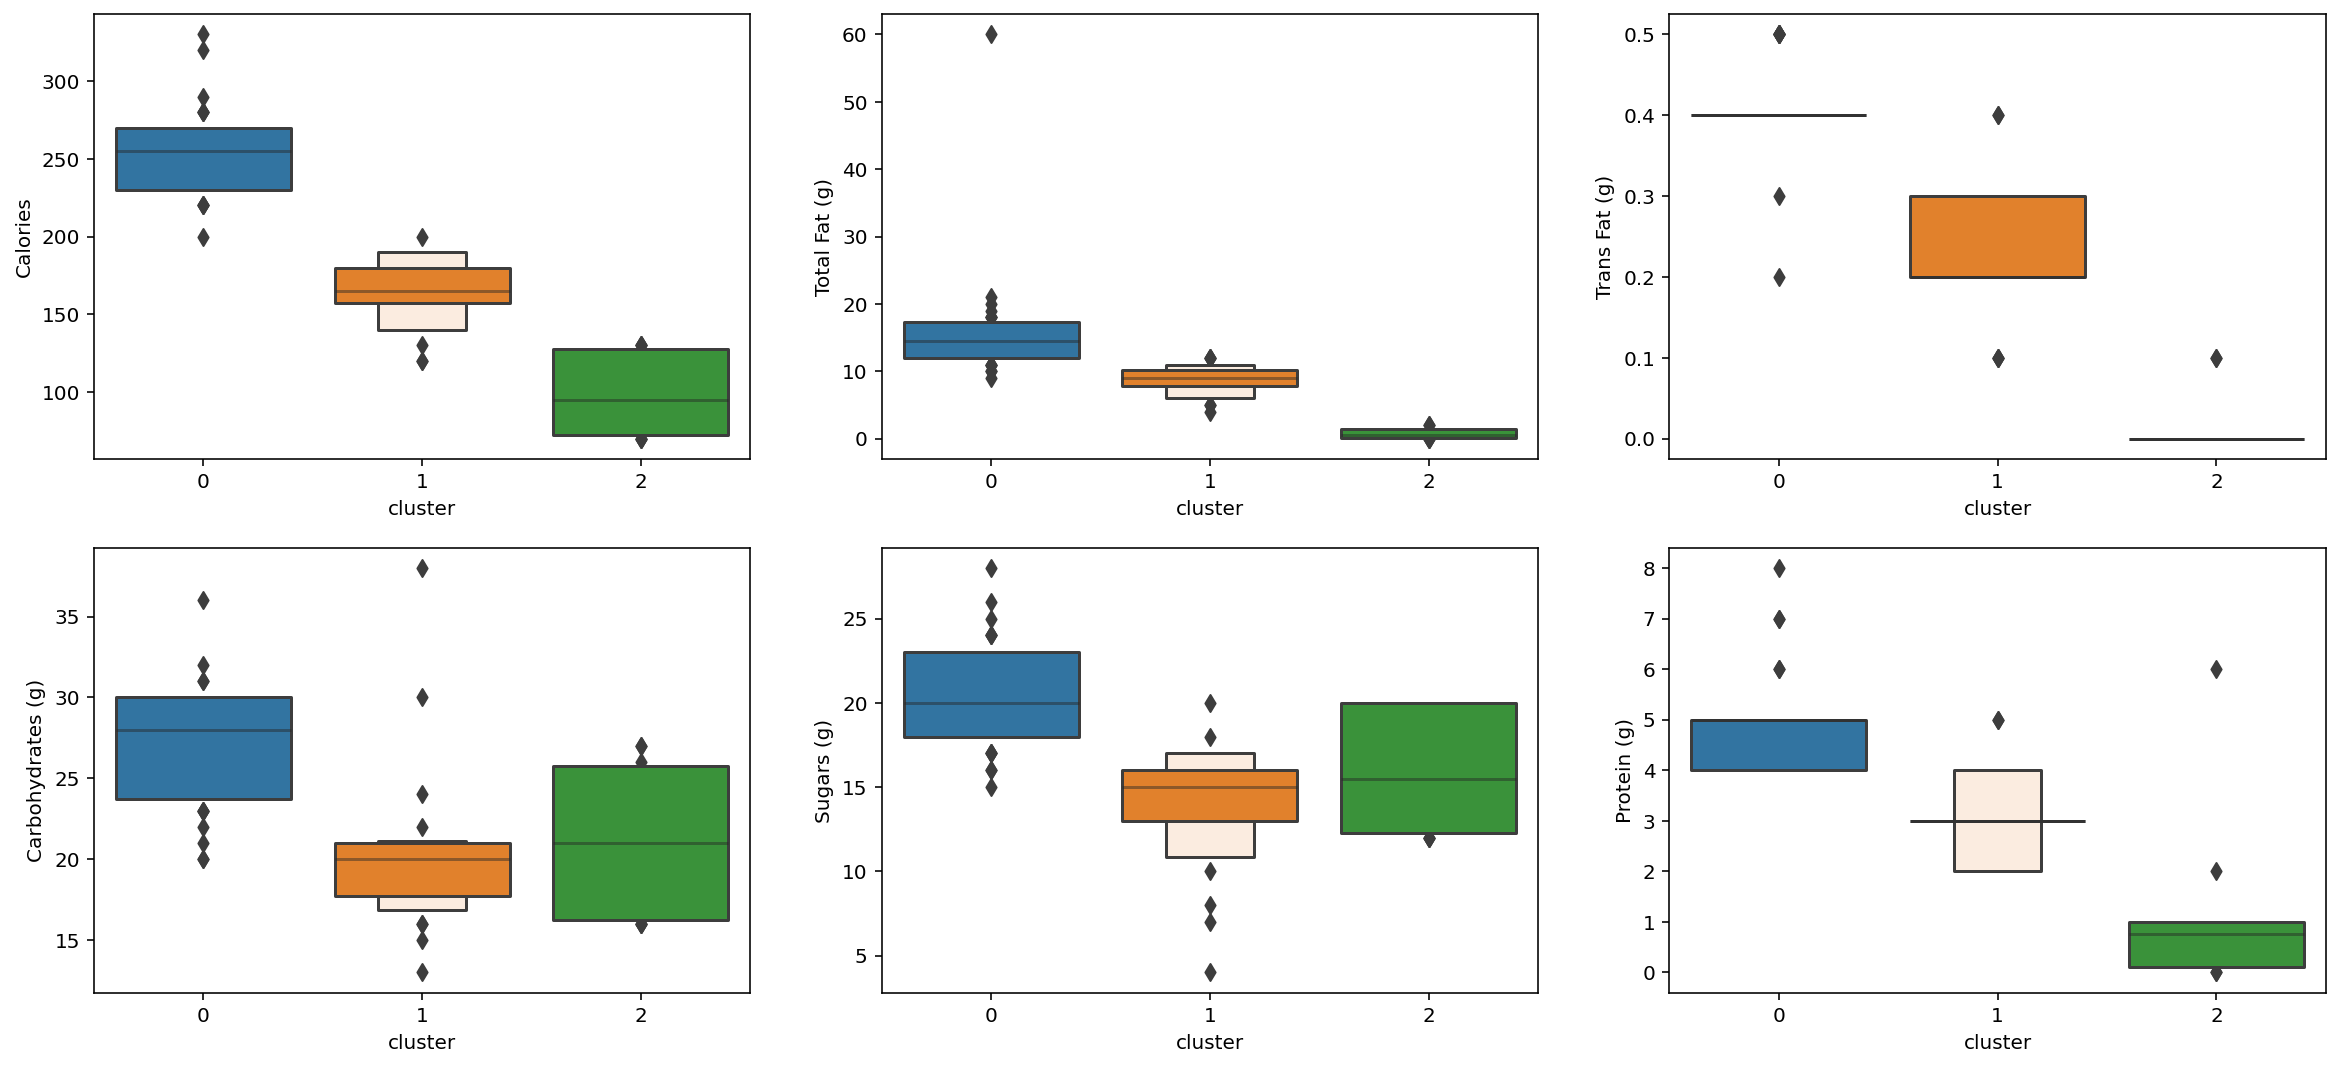

In [122]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 9))
ax=ax.ravel()
for i, col in enumerate(cols):
    sns.boxenplot(x='cluster', y=col, data=df, ax=ax[i])


raw data (no scaling)

- ສະແດງຂໍ້ມູນແບບ heat map 
- ຄ່າຈະສູງ ຫຼື ຕ່ຳແມ່ນຂື້ນກັບຄວາມເຂັ້ມຂອງສີ

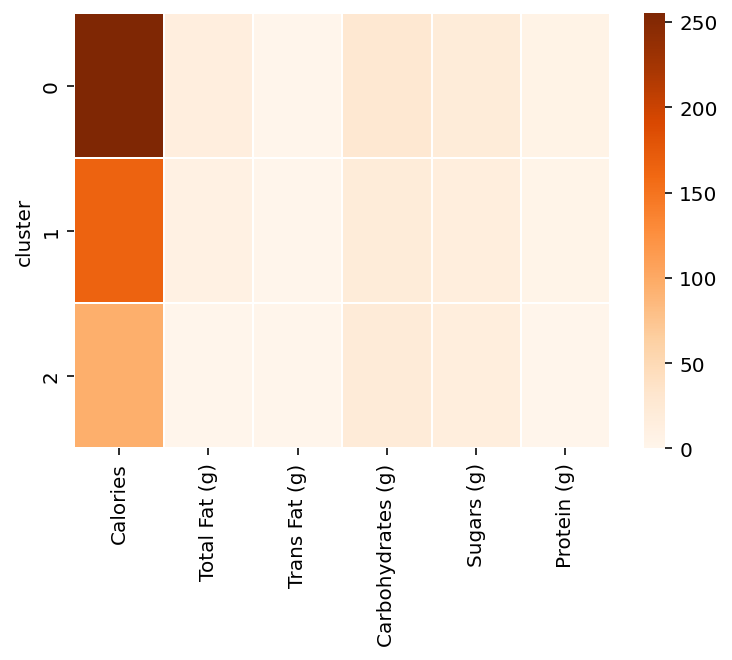

In [123]:
sns.heatmap(df.groupby('cluster').median(), cmap='Oranges', linewidths=1);

- ວາງຕົວແປ dx=X ແລະ ສະແດງຄ່າຂໍ້ມູນທີ່ມີການແປງ scaler ມາແລ້ວ

In [124]:
dx=X
dx['cluster']=model.labels_
dx.head()


,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
0,-0.499816,-0.191406,-0.643961,-0.447402,-0.219051,-0.943181,1
1,-0.499816,-0.039724,-0.643961,-0.672273,-0.883644,-0.346462,1
2,-0.334348,-0.039724,0.046059,-0.235261,-0.442092,-0.346462,1
3,-1.175713,-0.919995,-1.222738,-1.166310,-0.219051,-0.346462,1
4,-1.004409,-1.417016,-1.222738,0.672892,0.686477,-0.943181,2


- ສະແດງຂໍ້ມູນ cluster

In [125]:
dx.groupby('cluster').median()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
cluster,,,,,,
0,1.029516,0.671798,0.857656,0.980131,0.686477,0.859598
1,-0.417082,-0.039724,-0.643961,-0.447402,-0.442092,-0.346462
2,-1.612508,-1.935544,-1.700508,-0.328836,-0.326237,-1.680032


- ສະແດງຂໍ້ມູນໃນຮູບແບບ heat map ອີກຄັ້ງ 
- ຄ່າຂອງຂໍ້ມູນທີ່ມີສີເຂັ້ມຫຼາຍເທົ່າໃດກໍ່ຈະມີຄ່າສູງເທົ່ານັ້ນຕາມທີ່ສະແດງໃນຕາຕະລາງ

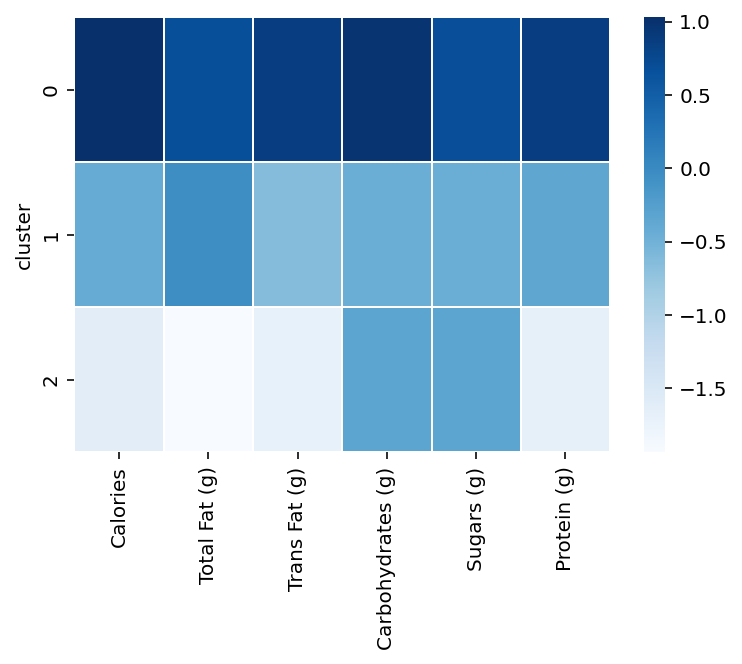

In [126]:
sns.heatmap(dx.groupby('cluster').median(), cmap="Blues", linewidths=1);

- ເປັນການສະແດງຂໍ້ມູນແບບປຽບທຽບຂໍ້ມູນທີ່ມີການແປງ scaler ກັບ ບໍ່ມີການແປງ scaler
- map ສີສົ້ມຂະເປັນຂໍ້ມູນທີ່ບໍ່ມີການແປງ scaler
- map ສີັ້າແມ່ນມີການແປງ scaler

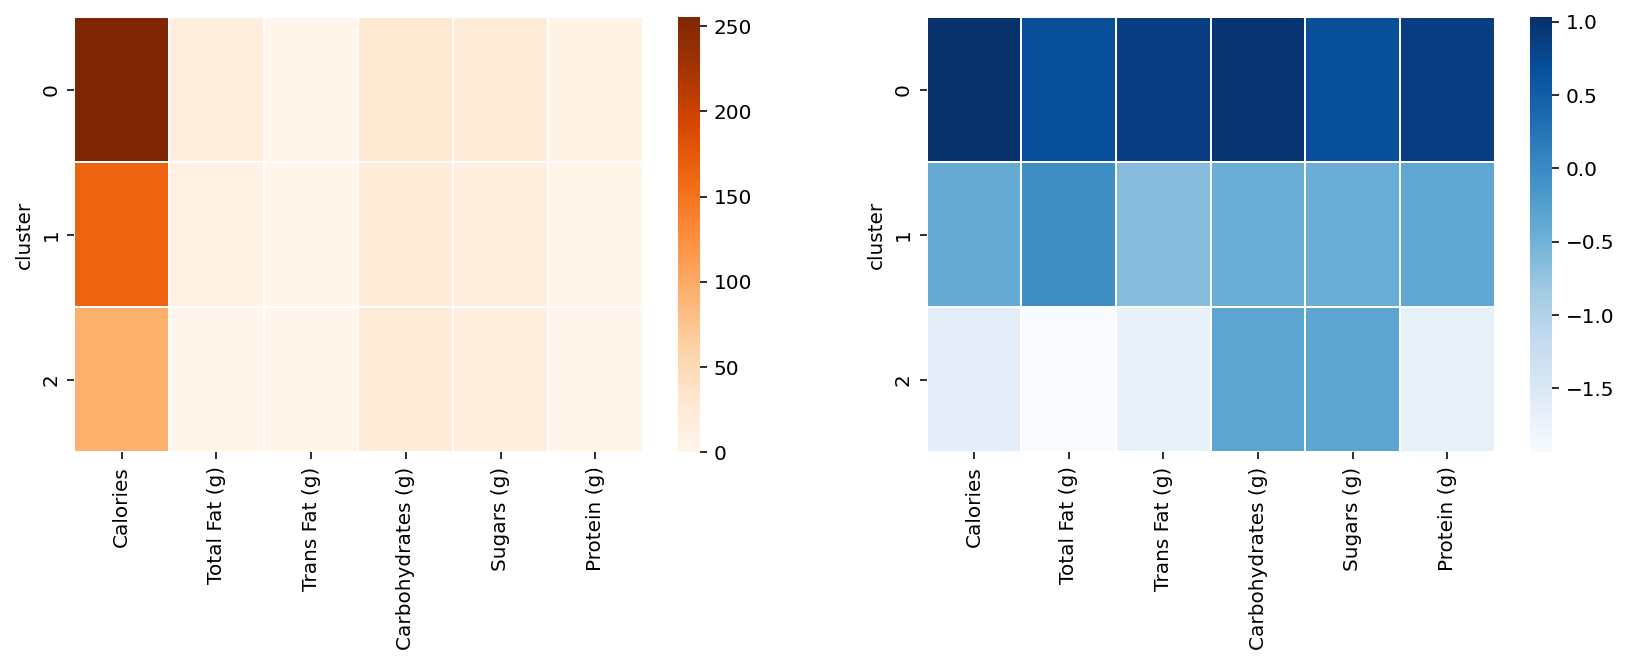

In [130]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 4))
ax=ax.ravel()
sns.heatmap(df.groupby('cluster').median(), cmap="Oranges", linewidths=1, ax=ax[0]);
sns.heatmap(dx.groupby('cluster').median(), cmap="Blues", linewidths=1, ax=ax[1]);




- ເປັນການສະແດງຂໍ້ມູນແບບປຽບທຽບຂໍ້ມູນຄືກັບຂ້າງເທິງ ແຕ່ວ່າມີການສະແດງຄ່າຕົວເລກຂອງຂໍ້ມູນ

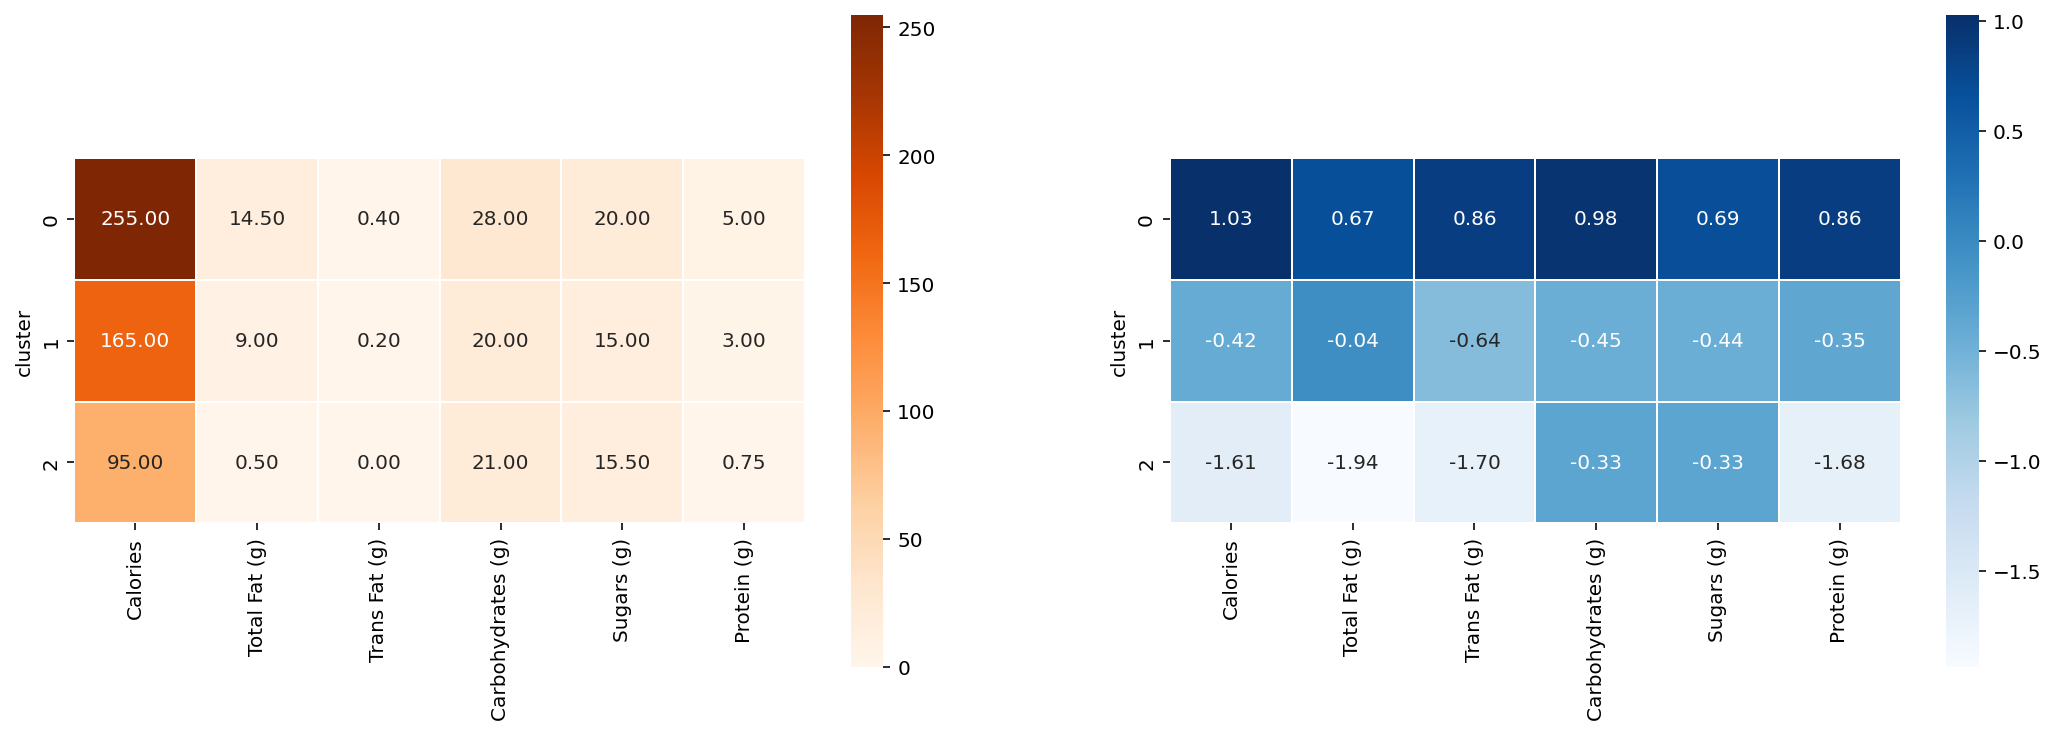

In [131]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'cluster']
fig, ax = plt.subplots(ncols=2, figsize=(18, 6))
ax=ax.ravel()
sns.heatmap(df[cols].groupby('cluster').median(), cmap="Oranges", linewidths=1,             square=True, annot=True, fmt='.2f',ax=ax[0]);
sns.heatmap(dx[cols].groupby('cluster').median(), cmap="Blues", linewidths=1, 
            square=True, annot=True, fmt='.2f', ax=ax[1]);




- ສະແດງຂໍ້ມູນແບບລຽງຕາມຄ່າໝາຍເລກຂອງ cluster

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
9,Cherries Jubilee,220,11.0,0.4,26,19,4.0,0
11,Chocolate,230,13.0,0.4,25,18,5.0,0
12,Chocolate Chip,240,15.0,0.5,23,18,5.0,0
0,Bananas Foster,160,8.0,0.2,20,16,2.0,1
1,Baseball Nut,160,9.0,0.2,19,13,3.0,1
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,1
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,2
17,Citrus Twist Ice,100,0.0,0.0,25,18,0.0,2
33,Mango Sorbet,70,0.0,0.0,16,12,0.0,2


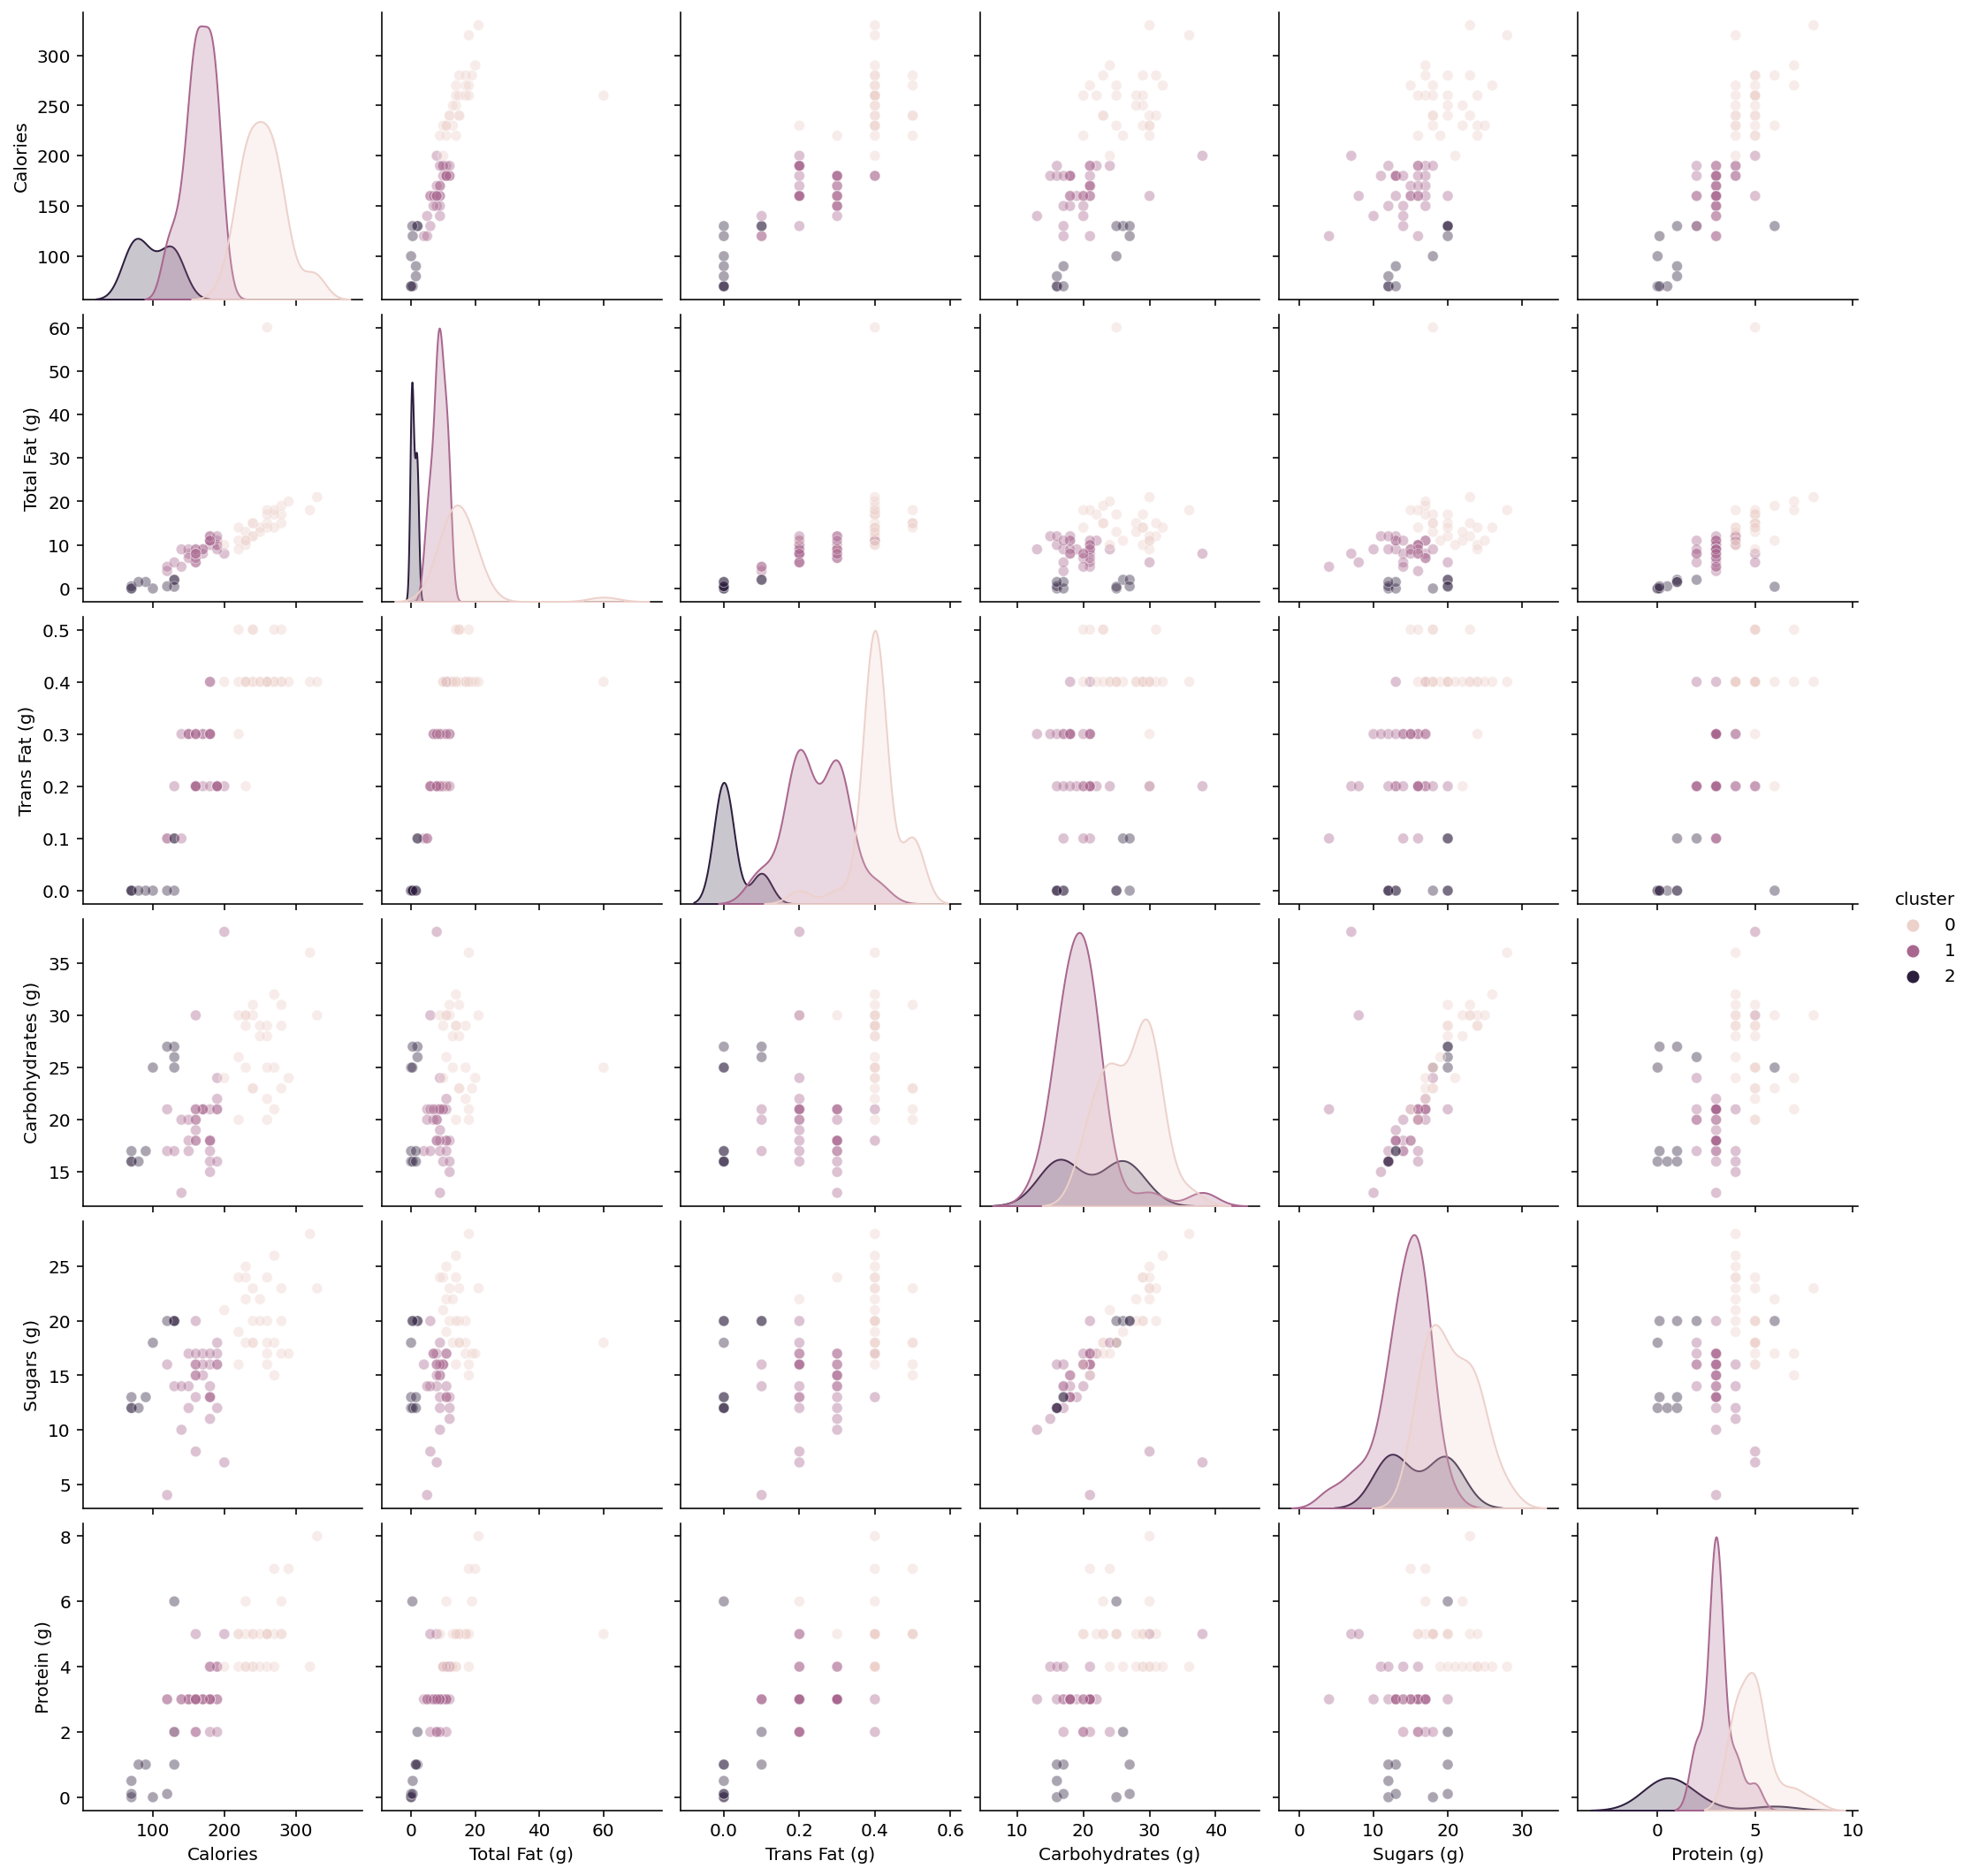

In [133]:


sns.pairplot(df, vars=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)'], 
             hue='cluster',
             plot_kws={'alpha': .4});

df.groupby('cluster').head(3).sort_values('cluster')

ສະຫຼຸບ: ເປັນການນຳເອົາຂໍ້ມູນຂອງ ice-cream ມາວິເຄາະດ້ວຍ Kmeans Clustering ເພື່ອໃຫ້ສາມາດນຳເອົາຂໍ້ມູນໄປໃຊ້ປະໂຫຍດເຊັ່ນວ່າ : ການເອົາຂໍ້ມູນມາຕັ້ງເປັນຊື່ໃຫ້ກັບ ice-cream ໃຫ້ມີຄວາມໜ້າສົນໃຈຫຼາຍຂື້ນ